# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
sn.set_style("darkgrid")
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split

ames = pd.read_csv('ames.csv', index_col=0)
ames



c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [2]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [3]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

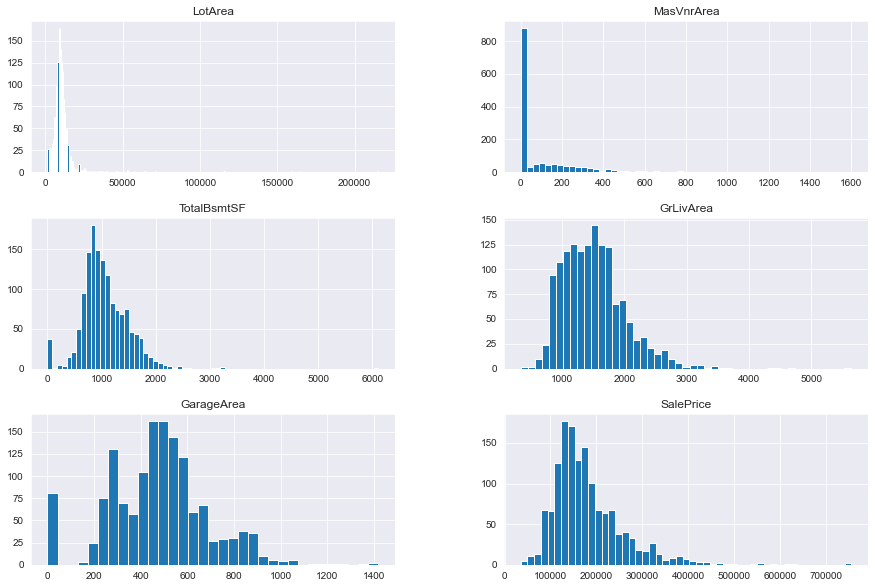

In [4]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [8]:
#Your code here - build a linear regression model with un-transformed features
X = ames[['LotArea', 'MasVnrArea','TotalBsmtSF', 'GrLivArea', 'GarageArea']]
y = ames['SalePrice']
#split data into train-test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
#initial model
model_initial= LinearRegression()
model_initial.fit(X_train, y_train)
# make prediction on the model
y_pred = model_initial.predict(X_test)
y_pred
#model coefficient and intercept
print('Intercept:', model_initial.intercept_)
print('coefficients:', model_initial.coef_)


Intercept: -3869.5584030961036
coefficients: [ 0.20817834 62.57317014 41.23505401 57.76079391 91.9818282 ]


## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [9]:
#Evaluating the model: 
y_pred = model_initial.predict(X_test) #predicting the y
y_pred
#mean-squared-error
#r-squared 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) # 0-1: the higher(closer to 1) the better the model
print("mse", mse)
print ("r2:", r2)



mse 2467228122.9875436
r2: 0.7059519501812883


In [10]:
import statsmodels.api as sm
X_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     448.1
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          2.05e-267
Time:                        21:28:40   Log-Likelihood:                -14065.
No. Observations:                1161   AIC:                         2.814e+04
Df Residuals:                    1155   BIC:                         2.817e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3869.5584   4557.147     -0.849      

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


The model explains 65.8% of the variance in the SalePrice

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [14]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters

# 1 square foot = 0.092903
X_meters = X.copy() 
X_meters[["LotArea", "MasVnrArea","TotalBsmtSF", "GrLivArea", "GarageArea"]] = X_meters[["LotArea", "MasVnrArea","TotalBsmtSF", "GrLivArea", "GarageArea"]] * 0.092903
#Initialize the new model
meters_model = sm.OLS(y, sm.add_constant(X_meters))
meters_results = meters_model.fit()
print(meters_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:39:08   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [ ]:
# Your written answer here
#The model overall is statistically significant and explains about 67.5% of the variance in sale price.

# The coefficients are all statistically significant.

#`LotArea`: for each additional square meter of lot area, the price increases by about \\$2.7638
#`MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$592.5326
#`TotalBsmtSF`: for each additional square meter of basement area, the price increases by about \\$475.3778
#`GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687.2148
# `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1006.0270

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [27]:
# Your code here - center data
X_centered = X_meters.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
X_centered

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea
Id,,,,,
1,-191.127128,8.576316,-18.566396,18.200478,7.016480
2,-84.288678,-9.632672,19.152222,-23.420066,-1.158984
3,69.001272,5.417614,-12.620604,25.261106,12.590660
4,-88.933828,-9.632672,-27.856696,18.850799,15.749362
5,348.639302,22.883378,8.282571,63.537142,33.772544
...,...,...,...,...,...
1456,-240.644427,-9.632672,-9.554805,12.347589,-1.158984
1457,247.839547,1.422785,45.165062,51.924267,2.557136
1458,-136.128552,-9.632672,8.932892,76.729368,-20.482808


In [28]:
# building a new Centred model
centered_model = sm.OLS(y, sm.add_constant(X_centered))
centered_model_results = centered_model.fit()
print(centered_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:44:47   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [ ]:
# The Sale Price of the house is approximatley $180,600.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [30]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
# Model standardization
standardized_model = sm.OLS(y, sm.add_constant(X_centered))
standardized_results = standardized_model.fit()
standardized_results.params

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


const          180615.063361
LotArea             2.763844
MasVnrArea        592.532631
TotalBsmtSF       475.377849
GrLivArea         687.214850
GarageArea       1006.027003
dtype: float64

In [ ]:
# The "most important" feature is "GarageArea" because if have the largest Coefficient of 10006. 


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!